In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('refined-data/eval_data.csv')
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DISTRICT  2764 non-null   object 
 1   LOCATION  2764 non-null   object 
 2   PH        2757 non-null   float64
 3   EC        2759 non-null   float64
 4   TDS       2757 non-null   float64
 5   TH        2757 non-null   float64
 6   CA        2757 non-null   float64
 7   MG        2757 non-null   float64
 8   NA        2757 non-null   float64
 9   K         2757 non-null   float64
 10  CO3       2757 non-null   float64
 11  HCO3      2757 non-null   float64
 12  CL        2757 non-null   float64
 13  NO3       2757 non-null   float64
 14  SO4       2757 non-null   float64
 15  F         2757 non-null   float64
 16  ALK       2757 non-null   float64
 17  YEAR      2764 non-null   int64  
 18  SAR       2183 non-null   float64
dtypes: float64(16), int64(1), object(2)
memory usage: 410.4+ KB


# Filling missing values with median

In [3]:
# df = df.dropna()
# df.columns

import pandas as pd

# Assuming df is your DataFrame with numerical columns containing null values
# Replace 'numerical_columns' with the actual names of your numerical columns
numerical_columns = ['PH','EC','TDS','ALK','TH', 'F','CL','NO3','SO4','CA','MG']  # List of numerical columns

# Fill null values with the mean of each column
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

### 1. Normalize the data

In [4]:
water_data = df.drop(['DISTRICT','YEAR','LOCATION'], axis=1).reset_index(drop=True)
water_data

,PH,EC,TDS,TH,CA,MG,NA,K,CO3,HCO3,CL,NO3,SO4,F,ALK,SAR
0,8.25,5090.0,3410.0,450.0,80.0,60.0,937.0,0.3,0.0,891.0,959.0,24.00,346.0,2.80,730.0,NaN
1,8.23,14210.0,9521.0,1300.0,180.0,207.0,3220.0,9.9,0.0,1013.0,3373.0,1600.00,1290.0,6.64,830.0,NaN
2,8.17,685.0,459.0,220.0,52.0,22.0,49.0,13.6,0.0,305.0,50.0,2.00,2.0,0.44,250.0,NaN
3,8.19,10660.0,7142.0,800.0,140.0,109.0,1875.0,7.2,0.0,988.0,2485.0,32.00,443.0,11.20,810.0,NaN
4,8.03,1300.0,871.0,280.0,64.0,29.0,210.0,3.7,0.0,305.0,85.0,230.00,171.0,0.50,250.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,7.42,768.0,515.0,180.0,40.0,19.0,95.0,10.0,0.0,183.0,113.0,3.20,70.0,0.15,150.0,3.08
2760,7.73,4419.0,2961.0,701.0,96.0,112.0,712.0,17.0,0.0,403.0,1064.0,13.00,310.0,0.78,330.0,11.70
2761,7.60,2942.0,1971.0,400.0,132.0,17.0,552.0,26.0,0.0,281.0,567.0,33.00,538.0,0.93,230.0,12.00
2762,7.35,1464.0,981.0,410.0,104.0,36.0,125.0,18.0,0.0,610.0,142.0,0.31,25.0,1.04,500.0,2.68


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(water_data)
scaled_data = scaler.transform(water_data)
scaled_data = pd.DataFrame(scaled_data, columns=water_data.columns)
scaled_data

,PH,EC,TDS,TH,CA,MG,NA,K,CO3,HCO3,CL,NO3,SO4,F,ALK,SAR
0,0.002561,0.191497,0.185135,0.070175,0.041394,0.046985,0.170403,0.000548,0.0,0.306252,0.103366,0.015000,0.138956,0.250000,0.289819,NaN
1,0.002535,0.534612,0.530977,0.219298,0.095861,0.162099,0.586477,0.018099,0.0,0.349347,0.365472,1.000000,0.518072,0.592857,0.330870,NaN
2,0.002460,0.025771,0.018127,0.029825,0.026144,0.017228,0.008566,0.024863,0.0,0.099258,0.004669,0.001250,0.000803,0.039286,0.092775,NaN
3,0.002485,0.401053,0.396341,0.131579,0.074074,0.085356,0.341352,0.013163,0.0,0.340516,0.269055,0.020000,0.177912,1.000000,0.322660,NaN
4,0.002283,0.048909,0.041444,0.040351,0.032680,0.022709,0.037908,0.006764,0.0,0.099258,0.008469,0.143750,0.068675,0.044643,0.092775,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,0.001514,0.028894,0.021297,0.022807,0.019608,0.014879,0.016949,0.018282,0.0,0.056164,0.011509,0.002000,0.028112,0.013393,0.051724,0.036724
2760,0.001905,0.166253,0.159724,0.114211,0.050109,0.087706,0.129397,0.031079,0.0,0.133875,0.114767,0.008125,0.124498,0.069643,0.125616,0.139502
2761,0.001741,0.110685,0.103697,0.061404,0.069717,0.013312,0.100237,0.047532,0.0,0.090781,0.060803,0.020625,0.216064,0.083036,0.084565,0.143079
2762,0.001425,0.055079,0.047669,0.063158,0.054466,0.028191,0.022417,0.032907,0.0,0.206994,0.014658,0.000194,0.010040,0.092857,0.195402,0.031954


In [6]:
wqi_df = pd.DataFrame({
    'features':        ['PH','EC','TDS','ALK','TH', 'F','CL','NO3','SO4','CA','MG'],
    'standard_values': [8.5 , 300, 1000,  120, 300, 1.5, 250,  45,  250,  75,  30],
    'ideal_values':    [    7,  0,    0,    0,   0,   0,   0,   0,    0,   0,   0],
})

In [7]:
import numpy as np

# calculate entropy weight and information entropy for entropy water quality index
def information_entropy(df):
    # calculate information entropy
    information_entropy_arr = {}
    for i in range(len(df.columns)):
        p = df.iloc[:,i]/df.iloc[:,i].sum()
        entropy = - (p * np.log(p)/np.log(len(df))).sum()
        information_entropy_arr[df.columns.to_list()[i]] = entropy
    return information_entropy_arr

def entropy_weight(df):
    # calculate entropy weight
    information_entropy_arr_res = information_entropy(df)
    information_entropy_arr = np.array(list(information_entropy_arr_res.values()))
    # print(information_entropy_arr_res)
    information_entropy_arr_sum = np.sum(1 - information_entropy_arr)
    information_entropy_arr_res_df = pd.DataFrame({
        'features': list(information_entropy_arr_res.keys()),
        'information_entropy': list(information_entropy_arr_res.values())
    })
    # print(information_entropy_arr_res_df)
    information_entropy_arr_res_df['entropy_weights'] = (1 - information_entropy_arr_res_df['information_entropy'])/information_entropy_arr_sum
    # print(information_entropy_arr_res_df)
    return information_entropy_arr_res_df

entropy_weight_arr = entropy_weight(scaled_data[wqi_df['features']])
entropy_weight_arr

,features,information_entropy,entropy_weights
0,PH,0.902145,0.138012
1,EC,0.948779,0.072241
2,TDS,0.937270,0.088473
3,ALK,0.979344,0.029133
4,TH,0.948013,0.073322
5,F,0.953563,0.065494
6,CL,0.896256,0.146318
7,NO3,0.915268,0.119504
8,SO4,0.917961,0.115706
9,CA,0.951350,0.068615


In [8]:
wqi_df['weights'] = entropy_weight_arr['entropy_weights'].to_list()
wqi_df

,features,standard_values,ideal_values,weights
0,PH,8.5,7,0.138012
1,EC,300.0,0,0.072241
2,TDS,1000.0,0,0.088473
3,ALK,120.0,0,0.029133
4,TH,300.0,0,0.073322
5,F,1.5,0,0.065494
6,CL,250.0,0,0.146318
7,NO3,45.0,0,0.119504
8,SO4,250.0,0,0.115706
9,CA,75.0,0,0.068615


In [9]:
import numpy as np

qe = pd.DataFrame()
qi_wi = []

for col in wqi_df['features']:
    # print('col = ', col)
    v_ideal = wqi_df[wqi_df['features'] == col]['ideal_values'].values[0]
    s_value = wqi_df[wqi_df['features'] == col]['standard_values'].values[0]
    # print(v_ideal, s_value)
    qe[col] = 100 * (water_data[col] - v_ideal) / (s_value - v_ideal)

for row in qe.iterrows():
    qi_wi.append((np.array(row[1])*wqi_df['weights']).sum())

qe

,PH,EC,TDS,ALK,TH,F,CL,NO3,SO4,CA,MG
0,83.333333,1696.666667,341.0,608.333333,150.000000,186.666667,383.6,53.333333,138.4,106.666667,200.000000
1,82.000000,4736.666667,952.1,691.666667,433.333333,442.666667,1349.2,3555.555556,516.0,240.000000,690.000000
2,78.000000,228.333333,45.9,208.333333,73.333333,29.333333,20.0,4.444444,0.8,69.333333,73.333333
3,79.333333,3553.333333,714.2,675.000000,266.666667,746.666667,994.0,71.111111,177.2,186.666667,363.333333
4,68.666667,433.333333,87.1,208.333333,93.333333,33.333333,34.0,511.111111,68.4,85.333333,96.666667
...,...,...,...,...,...,...,...,...,...,...,...
2759,28.000000,256.000000,51.5,125.000000,60.000000,10.000000,45.2,7.111111,28.0,53.333333,63.333333
2760,48.666667,1473.000000,296.1,275.000000,233.666667,52.000000,425.6,28.888889,124.0,128.000000,373.333333
2761,40.000000,980.666667,197.1,191.666667,133.333333,62.000000,226.8,73.333333,215.2,176.000000,56.666667
2762,23.333333,488.000000,98.1,416.666667,136.666667,69.333333,56.8,0.688889,10.0,138.666667,120.000000


In [10]:
qe['qi_wi'] = qi_wi
qe['EWQI'] = qe['qi_wi'] / wqi_df['weights'].sum()
qe

,PH,EC,TDS,ALK,TH,F,CL,NO3,SO4,CA,MG,qi_wi,EWQI
0,83.333333,1696.666667,341.0,608.333333,150.000000,186.666667,383.6,53.333333,138.4,106.666667,200.000000,307.655924,307.655924
1,82.000000,4736.666667,952.1,691.666667,433.333333,442.666667,1349.2,3555.555556,516.0,240.000000,690.000000,1274.533598,1274.533598
2,78.000000,228.333333,45.9,208.333333,73.333333,29.333333,20.0,4.444444,0.8,69.333333,73.333333,59.095708,59.095708
3,79.333333,3553.333333,714.2,675.000000,266.666667,746.666667,994.0,71.111111,177.2,186.666667,363.333333,636.424848,636.424848
4,68.666667,433.333333,87.1,208.333333,93.333333,33.333333,34.0,511.111111,68.4,85.333333,96.666667,151.448314,151.448314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,28.000000,256.000000,51.5,125.000000,60.000000,10.000000,45.2,7.111111,28.0,53.333333,63.333333,55.241104,55.241104
2760,48.666667,1473.000000,296.1,275.000000,233.666667,52.000000,425.6,28.888889,124.0,128.000000,373.333333,287.785086,287.785086
2761,40.000000,980.666667,197.1,191.666667,133.333333,62.000000,226.8,73.333333,215.2,176.000000,56.666667,196.862044,196.862044
2762,23.333333,488.000000,98.1,416.666667,136.666667,69.333333,56.8,0.688889,10.0,138.666667,120.000000,102.900091,102.900091


In [11]:
qe['EWQI_CLASSIF'] = qe['EWQI'].apply(lambda x: 'Excellent' if x <= 25 else 'Good' if x <= 50 else 'Poor' if x <= 75 else 'Very Poor' if x <= 100 else 'Unsuitable')

In [12]:
qe.to_csv('quality_estimate_and_entropy_wqi.csv', index=False)

# AWQI v/s EWQI

In [13]:
awqi = pd.read_csv('quality_estimate_and_wqi.csv')[['WQI','WQI_CLASSIF']]
ewqi = pd.read_csv('quality_estimate_and_entropy_wqi.csv')[['EWQI','EWQI_CLASSIF']]

wqi = pd.concat([awqi, ewqi], axis=1)

awqi, ewqi

(             WQI WQI_CLASSIF
 0     179.179174  Unsuitable
 1     503.168402  Unsuitable
 2      39.979871        Good
 3     623.628660  Unsuitable
 4      57.007405        Poor
 ...          ...         ...
 2759   17.533385   Excellent
 2760   74.851919        Poor
 2761   67.464524        Poor
 2762   69.255678        Poor
 2763   35.477952        Good
 
 [2764 rows x 2 columns],
              EWQI EWQI_CLASSIF
 0      307.655924   Unsuitable
 1     1274.533598   Unsuitable
 2       59.095708         Poor
 3      636.424848   Unsuitable
 4      151.448314   Unsuitable
 ...           ...          ...
 2759    55.241104         Poor
 2760   287.785086   Unsuitable
 2761   196.862044   Unsuitable
 2762   102.900091   Unsuitable
 2763   101.454366   Unsuitable
 
 [2764 rows x 2 columns])

In [14]:
import seaborn as sns

sns.set()
sns.set_palette('bright')

<Axes: ylabel='Count'>

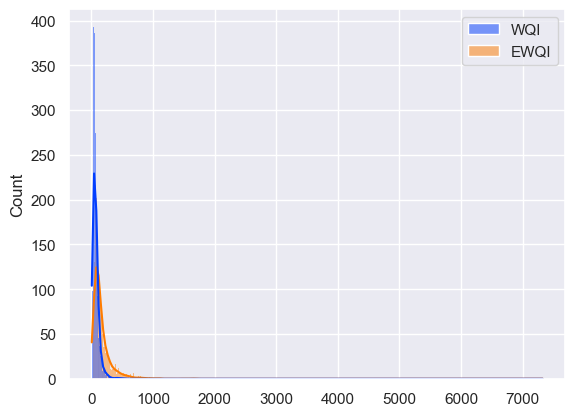

In [15]:
import matplotlib.pyplot as plt

sns.histplot([awqi['WQI'], ewqi['EWQI']], kde=True)

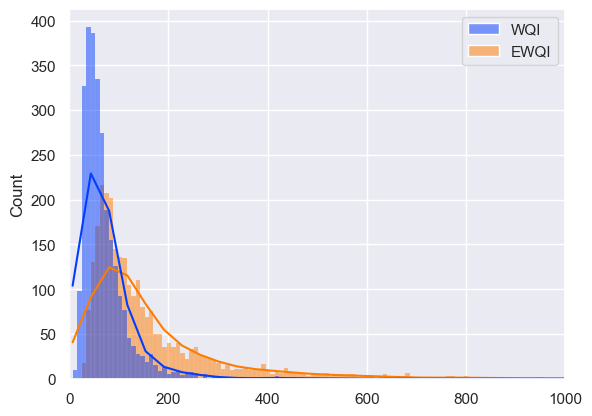

In [16]:
sns.histplot([awqi['WQI'], ewqi['EWQI']], kde=True)
plt.xlim(0, 1000)
plt.show()

# Bland-Altman Plot to measure the agreement between two methods

In [17]:
import plotly.express as px

def bland_altman_plot(data, method1, method2, title="Bland-Altman Plot"):
    """
    Create a Bland-Altman plot using Plotly.

    Parameters:
    - data: DataFrame containing the measurements for method1 and method2.
    - method1: Name of the first measurement method.
    - method2: Name of the second measurement method.
    - title: Title of the plot.

    Returns:
    - fig: Plotly figure.
    """
    mean_diff = (data[method1] + data[method2]) / 2
    diff = data[method1] - data[method2]

    fig = px.scatter(x=mean_diff, y=diff, labels={'x': 'Mean of Methods', 'y': 'Difference (Method1 - Method2)'},
                     title=title, hover_data=[data.index], width=800, height=500)

    fig.update_layout(showlegend=False)
    fig.add_hline(y=diff.mean(), line_dash="dash", line_color="red", annotation_text="Mean Difference",
                  annotation_position="bottom right")

    upper_limit = diff.mean() + 1.96 * diff.std()
    lower_limit = diff.mean() - 1.96 * diff.std()

    fig.add_hline(y=upper_limit, line_dash="dash", line_color="green", annotation_text="Upper Limit of Agreement",
                  annotation_position="bottom right")
    fig.add_hline(y=lower_limit, line_dash="dash", line_color="green", annotation_text="Lower Limit of Agreement",
                  annotation_position="top right")

    fig.update_traces(marker=dict(size=8))

    return fig

bland_altman_fig = bland_altman_plot(wqi, 'WQI', 'EWQI', title="Bland-Altman Plot")
bland_altman_fig.show()

In [22]:
wqi

,WQI,WQI_CLASSIF,EWQI,EWQI_CLASSIF
0,179.179174,Unsuitable,307.655924,Unsuitable
1,503.168402,Unsuitable,1274.533598,Unsuitable
2,39.979871,Good,59.095708,Poor
3,623.628660,Unsuitable,636.424848,Unsuitable
4,57.007405,Poor,151.448314,Unsuitable
...,...,...,...,...
2759,17.533385,Excellent,55.241104,Poor
2760,74.851919,Poor,287.785086,Unsuitable
2761,67.464524,Poor,196.862044,Unsuitable
2762,69.255678,Poor,102.900091,Unsuitable


<Axes: >

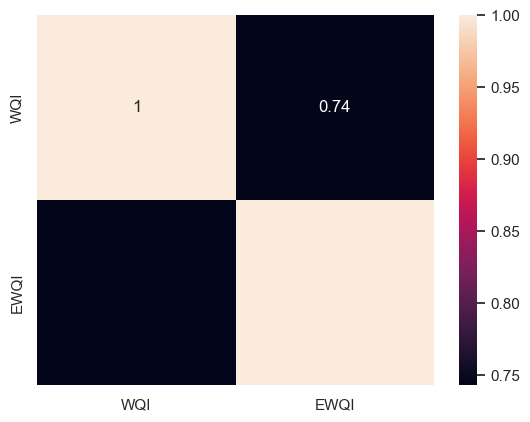

In [23]:
sns.heatmap(wqi[['WQI','EWQI']].corr(), annot=True)